In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2.)Explain in your own words what is NOIR classification of data

In [ ]:
[A] Nominal:It is a scale used for labeling variables into distinct classifications which does not involve any quantitative value or order.For instance
id number, address, gender etc. 
[B] Ordinal:It is a scale used to just simply depict the order among variables and not the difference between each of the variables.For instance:
     level of satisfaction, happiness, gradese etc.
[C] Interval: It is a scale used as a numerical scale where the order of the variables is known as well as the difference between these variables.
    It indicates the differences between two entities. For instance: Salary of an employee,Temperature etc.
[D] Ratio: It is a scale defined as a variable measurement scale which produces the order of variables and there is also a diffences between variables
    for instance: Height and weight of person(They cannot take value as 0)


3.)Classify the given dataset features into NOIR categories. (2 points)

In [ ]:
[A] Nominal: city, gender, relevant experience,major discipline,company type,target
[B] Ordinal: enrolled university,education level
[C] Interval:City development index, last new job, training hours
[D] Ratio: experience,company size

In [151]:
import matplotlib.pyplot as plt
#dataset=pd.read_csv("../input/257lab1-spring-22/x_train.csv")
dataset=pd.read_csv("x_train.csv")

In [152]:
#dataset_tar=pd.read_csv("../input/257lab1-spring-22/y_train.csv")
dataset_tar=pd.read_csv("y_train.csv")
dataset_tar

,index,target
0,17007,0.0
1,631,1.0
2,669,0.0
3,8949,0.0
4,2341,0.0
...,...,...
14363,16304,0.0
14364,79,0.0
14365,12119,0.0
14366,14147,0.0


In [153]:
df=pd.concat([dataset,dataset_tar["target"]],axis=1)
df

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22,1.0
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91,0.0
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,16304,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,157,0.0
14364,79,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,2,<10,Early Stage Startup,1,4,0.0
14365,12119,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Pvt Ltd,NaN,34,0.0
14366,14147,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,15,100-500,Public Sector,1,4,0.0


In [154]:
df_TEST=pd.read_csv("x_test.csv")
#df_TEST=pd.read_csv("../input/257lab1-spring-22/x_test.csv")
df_TEST

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16834,city_104,0.924,Male,Has relevent experience,no_enrollment,Primary School,NaN,15,100-500,Pvt Ltd,2,58
1,15437,city_114,0.926,Male,No relevent experience,no_enrollment,Masters,STEM,>20,10000+,Pvt Ltd,>4,308
2,8549,city_83,0.923,Male,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,8
3,7222,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,6,NaN,NaN,never,85
4,17054,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,7,500-999,NaN,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,5915,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,3,50-99,Pvt Ltd,2,17
4786,11083,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,100-500,Pvt Ltd,>4,77
4787,2335,city_103,0.920,NaN,Has relevent experience,NaN,Graduate,Humanities,>20,NaN,NaN,1,258
4788,7691,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,6,50-99,Pvt Ltd,1,95


4.) Summarize the dataset: (10 points)

a. Number of columns and rows present (1 point)
ANSWER.]]14368 rows × 13 columns

b. Min, max, avg, std dev etc. stats for continuous features 


In [155]:
df['training_hours'].describe()

count    14368.000000
mean        65.396645
std         60.277583
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

c. Number of unique values for categorical features

In [156]:
categorical_features=['city','gender','relevent_experience','enrolled_university','education_level','company_type','major_discipline']
for col in categorical_features:
    print(df[col].unique())

['city_61' 'city_94' 'city_114' 'city_16' 'city_98' 'city_11' 'city_160'
 'city_23' 'city_21' 'city_67' 'city_75' 'city_7' 'city_65' 'city_71'
 'city_77' 'city_83' 'city_103' 'city_19' 'city_136' 'city_126' 'city_90'
 'city_36' 'city_27' 'city_101' 'city_173' 'city_30' 'city_40' 'city_102'
 'city_116' 'city_24' 'city_41' 'city_149' 'city_165' 'city_44' 'city_64'
 'city_57' 'city_46' 'city_166' 'city_100' 'city_145' 'city_45' 'city_97'
 'city_28' 'city_50' 'city_176' 'city_73' 'city_20' 'city_141' 'city_138'
 'city_39' 'city_115' 'city_128' 'city_152' 'city_142' 'city_105'
 'city_104' 'city_162' 'city_74' 'city_157' 'city_131' 'city_89' 'city_70'
 'city_1' 'city_2' 'city_159' 'city_13' 'city_53' 'city_150' 'city_9'
 'city_76' 'city_123' 'city_72' 'city_14' 'city_54' 'city_91' 'city_10'
 'city_144' 'city_78' 'city_109' 'city_117' 'city_84' 'city_48' 'city_99'
 'city_175' 'city_79' 'city_43' 'city_33' 'city_8' 'city_37' 'city_80'
 'city_106' 'city_31' 'city_93' 'city_107' 'city_143' 'city

d. Number of nulls and Nans in each column

In [157]:
NULLvalues_col=['company_size','gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
df.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    3393
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
target                       0
dtype: int64

e. Visualize distribution of each feature using graphs (6 points)

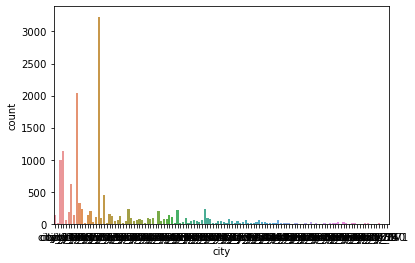

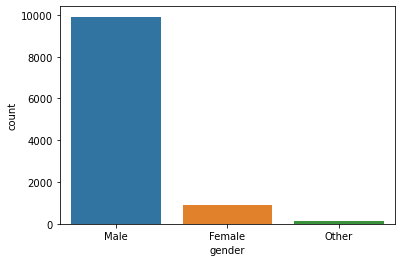

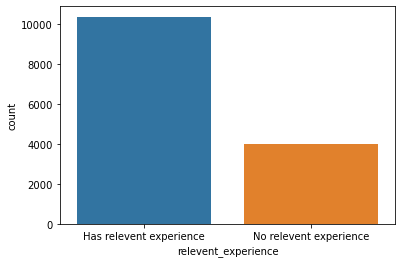

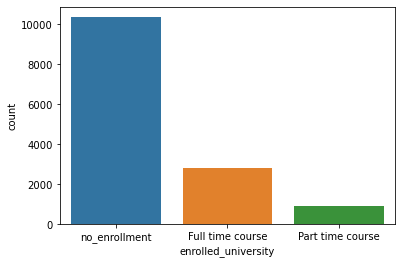

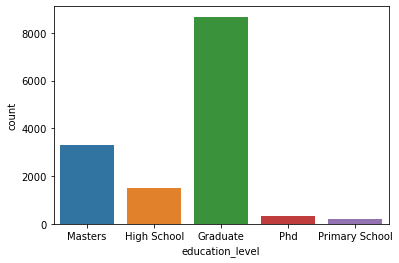

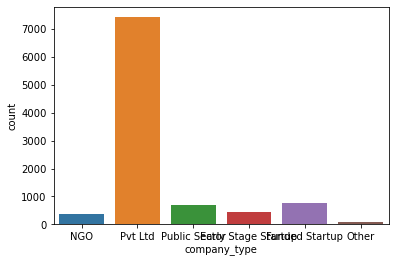

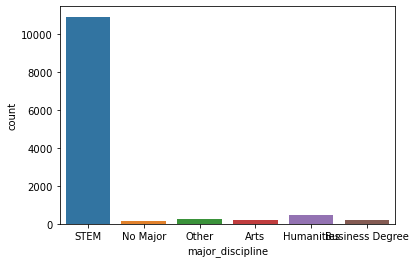

In [158]:
import seaborn as sns
for col in categorical_features:
     sns.countplot(x=col,data=df)
     plt.show()

In [159]:
df['last_new_job']=df['last_new_job'].replace('never',float(np.nan))
df_TEST['last_new_job']=df_TEST['last_new_job'].replace('never',float(np.nan))

In [160]:
df_TEST['experience'].unique()

array(['15', '>20', '2', '6', '7', '3', '9', '8', '16', '5', '10', '4',
       '14', '12', '17', nan, '<1', '11', '13', '20', '19', '1', '18'],
      dtype=object)

In [161]:
#np.nan==float(np.nan)
import math
def replace_gt_lt(x): 
    if isinstance(x,float)==False:
        if ('>' in x or '<' in x): 
            return int(x.replace('>',"").replace('<',""))
        else:
            return int(x)
    else:
        return x
df['experience']=df['experience'].apply(lambda x: replace_gt_lt(x))
df['last_new_job']=df['last_new_job'].apply(replace_gt_lt)
df_TEST['experience']=df_TEST['experience'].apply(lambda x: replace_gt_lt(x))
df_TEST['last_new_job']=df_TEST['last_new_job'].apply(replace_gt_lt)

In [162]:
df['training_hours'].describe()

count    14368.000000
mean        65.396645
std         60.277583
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

5. Visualize the relationship of each feature with target variable (hint: create density plots for continuous 
features and cross tables for categorical features)

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


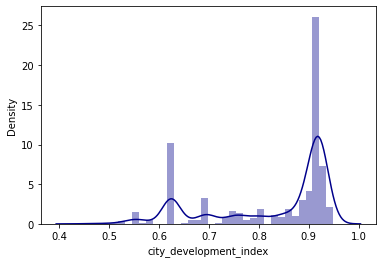

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


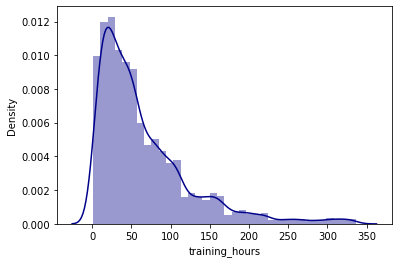

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


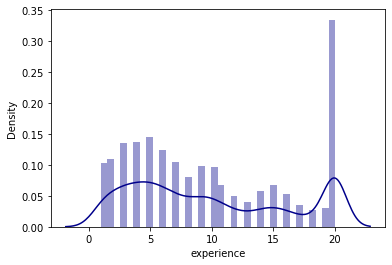

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


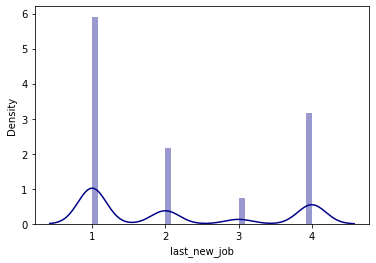

In [163]:
continuous_features=['city_development_index','training_hours','experience','last_new_job']
for col in continuous_features:   
    sns.distplot(df[col], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue')
    plt.show()

In [164]:
for col in categorical_features:
     x=pd.crosstab(df[col],df['target'])
     print(x)
     print('-----------------------------------------------------------------------------------------------------------------------')

target    0.0  1.0
city              
city_1     20    2
city_10    57    8
city_100  158   42
city_101   25   35
city_102  183   43
...       ...  ...
city_93    16    4
city_94     9    9
city_97    66    7
city_98    57    7
city_99    59    8

[123 rows x 2 columns]
-----------------------------------------------------------------------------------------------------------------------
target   0.0   1.0
gender            
Female   684   230
Male    7644  2270
Other    107    40
-----------------------------------------------------------------------------------------------------------------------
target                    0.0   1.0
relevent_experience                
Has relevent experience  8169  2216
No relevent experience   2636  1347
-----------------------------------------------------------------------------------------------------------------------
target                0.0   1.0
enrolled_university            
Full time course     1739  1071
Part time course      670   230
no

6.) Handle missing values: Use any three methods to handle missing values.

In [165]:
df['company_size']=df['company_size'].replace('<10','less than 10')
df['company_size']=df['company_size'].replace('10/49','10-50')
#range_adjust={<10:'<10',10/49:'10-50'}
df_TEST['company_size']=df['company_size'].replace('<10','less than 10')
df_TEST['company_size']=df['company_size'].replace('10/49','10-50')

In [166]:
df['company_size'].unique()

array(['100-500', nan, '50-99', '5000-9999', '10000+', '500-999',
       'less than 10', '10-50', '1000-4999'], dtype=object)

In [167]:
df.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    3393
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job              2143
training_hours               0
target                       0
dtype: int64

In [168]:
#for Training  Dataset
NULLvalues_col=['company_size','gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
x=pd.DataFrame()
def replace_nan(x,y):  
    if isinstance(x,float)==True:
        x=df[y].mode()[0]
        return x
    else:
       return x
       
            
for col in NULLvalues_col:
    df[col]=df[col].apply(lambda x: replace_nan(x,col))

In [169]:
#for Test Dataset
NULLvalues_col=['company_size','gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
x=pd.DataFrame()
def replace_nan(x,y):  
    if isinstance(x,float)==True:
        x=df_TEST[y].mode()[0]
        return x
    else:
       return x
          
for col in NULLvalues_col:
    df_TEST[col]=df_TEST[col].apply(lambda x: replace_nan(x,col))

In [170]:
df

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,100-500,NGO,1.0,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,no_enrollment,High School,STEM,20.0,50-99,Pvt Ltd,1.0,22,1.0
2,669,city_114,0.926,Male,Has relevent experience,Full time course,Masters,STEM,20.0,50-99,Pvt Ltd,1.0,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,20.0,50-99,Pvt Ltd,1.0,91,0.0
4,2341,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,5000-9999,Pvt Ltd,1.0,92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,16304,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,1.0,157,0.0
14364,79,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,20.0,less than 10,Early Stage Startup,1.0,4,0.0
14365,12119,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Pvt Ltd,1.0,34,0.0
14366,14147,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,100-500,Public Sector,1.0,4,0.0


In [171]:
df_TEST

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16834,city_104,0.924,Male,Has relevent experience,no_enrollment,Primary School,STEM,20.0,100-500,Pvt Ltd,1.0,58
1,15437,city_114,0.926,Male,No relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Pvt Ltd,1.0,308
2,8549,city_83,0.923,Male,No relevent experience,Full time course,High School,STEM,20.0,50-99,Pvt Ltd,1.0,8
3,7222,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,STEM,20.0,50-99,Pvt Ltd,1.0,85
4,17054,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,20.0,5000-9999,Pvt Ltd,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,5915,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,20.0,1000-4999,Pvt Ltd,1.0,17
4786,11083,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,1.0,77
4787,2335,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Humanities,20.0,50-99,Pvt Ltd,1.0,258
4788,7691,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,20.0,1000-4999,Pvt Ltd,1.0,95


8.) Scale the features for models that require scaling and perform required pre-processing
(such as one hot encoding etc.) (5 points)


In [172]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
scaling=MinMaxScaler()
#For training
L=scaling.fit_transform(df[['training_hours','experience','last_new_job']])
U_train=pd.DataFrame(data=L,columns=['training_hours','experience','last_new_job'])
#For testing
L=scaling.fit_transform(df_TEST[['training_hours','experience','last_new_job']])
V_test=pd.DataFrame(data=L,columns=['training_hours','experience','last_new_job'])

In [173]:
X=df[['company_size','city','gender','relevent_experience','enrolled_university','education_level','company_type','major_discipline']]
Xone_test=df_TEST[['company_size','city','gender','relevent_experience','enrolled_university','education_level','company_type','major_discipline']]

In [174]:
X.columns

Index(['company_size', 'city', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'company_type',
       'major_discipline'],
      dtype='object')

In [175]:
#ohe=OneHotEncoder()
#enc=ohe.fit_transform(X).toarray()
#features_heading= ohe.categories_

#for Training dataset
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df=enc.fit_transform(X).toarray()
headings=enc.categories_
import itertools
merged = list(itertools.chain(*headings))
df_enc=pd.DataFrame(data=enc_df,columns=merged)

In [176]:
#for test dataset
enc_df_test=enc.transform(Xone_test).toarray()
headings2=enc.categories_
merged2 = list(itertools.chain(*headings2))
df_test_enc=pd.DataFrame(data=enc_df_test,columns=merged2)

In [177]:
df_new

,city_development_index,target,10-50,100-500,1000-4999,10000+,50-99,500-999,5000-9999,less than 10,...,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,training_hours,experience,last_new_job
0,0.913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.062687,0.0,0.0
1,0.698,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.062687,0.0,0.0
2,0.926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.259701,0.0,0.0
3,0.926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.268657,0.0,0.0
4,0.910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.271642,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,0.920,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.465672,0.0,0.0
14364,0.920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.008955,0.0,0.0
14365,0.624,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.098507,0.0,0.0
14366,0.895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.008955,0.0,0.0


In [178]:
df_enc
# enc_df.get_feature_names(['city','gender','relevent_experience','enrolled_university','education_level','company_type','major_discipline'])
# enc_df.get_feature_names(['city','gender','relevent_experience','enrolled_university','education_level','company_type','major_discipline'])
# # merge with main df bridge_df on key values
#df_encoded_data=pd.DataFrame(data=enc,columns=features_heading)
#df_encoded_data

,10-50,100-500,1000-4999,10000+,50-99,500-999,5000-9999,less than 10,city_1,city_10,...,NGO,Other,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14365,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [179]:
df_new=df.join(df_enc)
df_new=df_new.drop(labels=['company_size','experience', 'last_new_job', 'training_hours','city','gender','relevent_experience','enrolled_university','education_level','company_type','major_discipline'], axis=1)
df_new=df_new.join(U_train)
df_new
#categorical_features=['city','gender','relevent_experience','enrolled_university','education_level','company_type','major_discipline']

,index,city_development_index,target,10-50,100-500,1000-4999,10000+,50-99,500-999,5000-9999,...,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,training_hours,experience,last_new_job
0,17007,0.913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.062687,0.0,0.0
1,631,0.698,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.062687,0.0,0.0
2,669,0.926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.259701,0.0,0.0
3,8949,0.926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.268657,0.0,0.0
4,2341,0.910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.271642,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,16304,0.920,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.465672,0.0,0.0
14364,79,0.920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.008955,0.0,0.0
14365,12119,0.624,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.098507,0.0,0.0
14366,14147,0.895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.008955,0.0,0.0


In [180]:
df_test_enc

,10-50,100-500,1000-4999,10000+,50-99,500-999,5000-9999,less than 10,city_1,city_10,...,NGO,Other,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4786,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4788,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [181]:
X1_test=df_TEST.join(df_test_enc)
X1_test=X1_test.drop(labels=['company_size','experience', 'last_new_job', 'training_hours','city','gender','relevent_experience','enrolled_university','education_level','company_type','major_discipline'], axis=1)
X1_test=X1_test.join(V_test)


In [189]:
X1_test

,index,city_development_index,10-50,100-500,1000-4999,10000+,50-99,500-999,5000-9999,less than 10,...,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,training_hours,experience,last_new_job
0,16834,0.924,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.170149,0.0,0.0
1,15437,0.926,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.916418,0.0,0.0
2,8549,0.923,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.020896,0.0,0.0
3,7222,0.920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.250746,0.0,0.0
4,17054,0.920,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.005970,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,5915,0.624,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.047761,0.0,0.0
4786,11083,0.920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.226866,0.0,0.0
4787,2335,0.920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.767164,0.0,0.0
4788,7691,0.624,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.280597,0.0,0.0


In [190]:
X1_Train= df_new.drop(columns=['target'])
Y1_Train=pd.DataFrame(data=df_new['target'])

9. Explain the following terms in detail

a. Pearson’s correlation

Correlation between sets of data is a measure of how well they are related. Pearson’s correlation measures the strengths of linear relationship between 2 independent variables. It ranges between -1 to 1, with a value of -1 meaning a total
negative correlation, +1 means a total positive correlation and 0 being there is no correlation between variables.


The PPMC is not able to tell the difference between dependent variables and independent variables. For example, if you are trying to find the correlation between a high calorie diet and diabetes, you might find a high correlation of .8. However, you could also get the same result with the variables switched around. In other words, you could say that diabetes causes a high calorie diet. That obviously makes no sense. Therefore, as a researcher you have to be aware of the data you are plugging in. In addition, the PPMC will not give you any information about the slope of the line; it only tells you whether there is a relationship.


b. T – test


A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features. It is mostly used when the data sets, like the data set recorded as the outcome from flipping a coin 100 times, would follow a normal distribution and may have unknown variances. A t-test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population. 




c. Chi squared test

A Chi-square test is a hypothesis testing method. Two common Chi-square tests involve checking if observed frequencies in one or 
more categories match expected frequencies.One uses a Chi-square test for hypothesis tests about whether your data is as expected. 
The basic idea behind the test is to compare the observed values in your data to the expected values that you would see if the null
hypothesis is true.


10 Perform Pearson correlation between continuous features and plot the heatmap of the correlation matrix.

In [ ]:
corr_mat = df_new[continuous_features].corr(method='pearson')
#plt.figure(figsize = (16, 12))
sns.heatmap(corr_mat, annot = True, fmt = '.3f',linecolor='black',cbar=True,center=1)

11. Perform t test on continuous features after dividing them using target variable

In [ ]:
#from scipy import stats
#from scipy.stats import chisquare
#rng = np.random.default_rng(df_new)
#rvs = stats.norm.rvs(loc=5, scale=10, size=(50, 2),arandom_state=rng)

In [ ]:
!pip install -q researchpy
import researchpy as rp
for column in df.iloc[:,1:3]:
 group1= df[column][df['target']==1]
 group2= df[column][df['target']==0]
 print('##',column)
 print(rp.ttest(group1,group2))

12. Perform Chi squared test among categorical variables and with the target variable (3 
points)

In [ ]:
!pip install --user numpy scipy 

In [ ]:
from scipy.stats import chi2_contingency 
for col in df.iloc[:,:]:
    contingency=pd.crosstab(df[col],df['target'])
    c,p_value,dof,expected=chi2_contingency(contingency)
    print(col,'\tP_value',p_value)

In [ ]:
df_table=pd.crosstab(df['target'],df['city'], margins=True, margins_name="Total")
df_table

13 Compare the features selected using visualization from question 5 and using the statistical 
tests from the previous three questions. (5 points)

We can conclude that gender, city development index, major discipline,training hours have correaltion with
our target variable. From the graphs of question 5 we can easily see the comparisons

14. Explain the following terms: 


In [ ]:
a. Forward Selection
It is a type of stepwise regression that starts as empty model and then slowly addes variables gradually. In each forward step, one variable is added
so that there is only one single best improvement to your model.

Forward selection typically begins with only an intercept. One tests the various variables that may be relevant, and the ‘best’ variable—where “best” is determined by some pre-determined criteria—is added to the model.

As the model continues to improve (per that same criteria) we continue the process, adding in one variable at a time and testing at each step. Once the model no longer improves with adding more variables, the process stops.

The criterion used to determine which variable goes in when are varied. You could be attempting to find the lowest score under cross validation, the lowest p-value, or any of a number of other tests or measures of accuracy.

b. Backward Elimination 
Backward elimination is a feature selection technique while building a machine learning model. It is used to remove those features that do not have a 
significant effect on the dependent variable or prediction of output. There are various ways to build a model in Machine Learning, which are: All-in,
Backward Elimination, Forward Selection, Bidirectional Elimination and Score Comparison

c. Recursive feature elimination 

Recursive Feature Elimination, or RFE in short, is a one of the most popular feature selection algorithm.
It is easy to configure and use as it the most effective in selecting features in training set that are more important in deciding the target 
variables.

There are 2 choices for configuring RFE:there is option in choosing number of features to select and the option of algorithm used for 
choosing the features. 



 16.Train at least 5 different classification models on the final data (Perform hyper parameter 
tuning using a validation set for each of the model). (10 points)

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import Lasso,Ridge
X_train, X_test, y_train, y_test = train_test_split(X1_Train,Y1_Train, test_size = 0.25,random_state=1234)

# min max scaling the variables
scaler =  RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X1_Train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_test.shape

In [ ]:
#Lasso regression
from sklearn.metrics import mean_squared_error
lasso_reg=Lasso(alpha= 0.0074,max_iter=1000,tol=0.0004,selection='cyclic')
lasso_reg.fit(X_train,y_train)
y_pred1 = pd.DataFrame(lasso_reg.predict(X_test_scaled))
#lasso_reg.score(X_test,y_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred1)))
rmse

In [ ]:
y_pred1.shape

In [ ]:
#Ridge regression
ridge_reg=Ridge(alpha= 0.000000000000435,max_iter=80,tol=0.2)
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)
#y_pred2 = ridge_reg.predict(X_test_scaled)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred1)))
rmse

In [ ]:
AUPRC

In [106]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
mn = svm.SVC(kernel='rbf',gamma=10)
mn.fit(X_train, y_train)
yl_test_pred = mn.predict(X_test)
print(classification_report(y_test,yl_test_pred))
confusion_matrix(y_test, yl_test_pred)

C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86      2729
         1.0       0.57      0.30      0.40       863

    accuracy                           0.78      3592
   macro avg       0.69      0.62      0.63      3592
weighted avg       0.75      0.78      0.75      3592



array([[2530,  199],
       [ 600,  263]], dtype=int64)

In [186]:
X_test

,city_development_index,10-50,100-500,1000-4999,10000+,50-99,500-999,5000-9999,less than 10,city_1,...,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,training_hours,experience,last_new_job
1614,0.920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.131343,0.0,0.0
4005,0.754,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.017910,0.0,0.0
13418,0.920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.071642,0.0,0.0
10598,0.624,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.182090,0.0,0.0
13917,0.448,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.038806,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,0.899,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.026866,0.0,0.0
7203,0.926,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.844776,0.0,0.0
11307,0.910,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.077612,0.0,0.0
7696,0.926,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.397015,0.0,0.0


In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
mn = svm.SVC(kernel='sigmoid',gamma=100)
mn.fit(X_train, y_train)
yl_test_pred = mn.predict(X_test)
print(classification_report(y_test,yl_test_pred))
confusion_matrix(y_test, yl_test_pred)

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
mn = svm.SVC(kernel='poly',gamma=10)
mn.fit(X_train, y_train)
yl_test_pred = mn.predict(X_test)
print(classification_report(y_test,yl_test_pred))
confusion_matrix(y_test, yl_test_pred)

C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',C=1.0,max_iter = 1000)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))
#confusion_matrix(y_train, y_train_pred)
accuracy_score(y_train,y_train_pred,normalize=False)

In [ ]:
from sklearn.model_selection import cross_validate
model = LogisticRegression(penalty='l2',C=1.0,max_iter = 1000)
scores = cross_validate(model, X1_Train,Y1_Train, cv = 4, scoring = 'accuracy', return_train_score = True)
scores

In [187]:
X1_test

,index,city_development_index,10-50,100-500,1000-4999,10000+,50-99,500-999,5000-9999,less than 10,...,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,training_hours,experience,last_new_job
0,16834,0.924,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.170149,0.0,0.0
1,15437,0.926,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.916418,0.0,0.0
2,8549,0.923,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.020896,0.0,0.0
3,7222,0.920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.250746,0.0,0.0
4,17054,0.920,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.005970,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,5915,0.624,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.047761,0.0,0.0
4786,11083,0.920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.226866,0.0,0.0
4787,2335,0.920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.767164,0.0,0.0
4788,7691,0.624,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.280597,0.0,0.0


In [192]:
#Randome Forest
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
rr = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=100, min_samples_split=2, min_samples_leaf=10,max_features=100, min_weight_fraction_leaf=0.0,random_state=42,max_leaf_nodes=10)
rr.fit(X_train, y_train)
y_train_pred = rr.predict(X_train)

C:\Users\Checkout\AppData\Local\Temp/ipykernel_28320/1245930011.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rr.fit(X_train, y_train)


In [193]:
y_test_pred = rr.predict(X1_test)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      8076
         1.0       0.58      0.43      0.49      2700

    accuracy                           0.78     10776
   macro avg       0.70      0.66      0.68     10776
weighted avg       0.76      0.78      0.77     10776



In [132]:
y_test_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [196]:
dfy = pd.DataFrame(y_test_pred, columns= ['target'])
#df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)
dfy.to_csv(r'C:\Users\Checkout\Desktop\Spring 22\File Name.csv')
dfy

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4785,1.0
4786,0.0
4787,0.0
4788,1.0


17. Write any one classification algorithm without using scikit-learn and train on the final 
data. (10 points)

In [47]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
class LogisticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((X.shape[1]+1,1))
        X = np.c_[np.ones((X.shape[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis
    
LR_model_ = LogisticRegression()
LR_model_.fit(X_train.values,y_train.values)    


print("Results on Train:\n")
Y_TR_PRED = LR_model_.predict(X_train)
print(classification_report(y_train, Y_TR_PRED))

print("#"*100)

print("Results on Test:\n")
Y_TST_PRED = LR_model_.predict(X_test)
print(classification_report(y_test, Y_TST_PRED))

Results on Train:

              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      8076
         1.0       0.50      0.69      0.58      2700

    accuracy                           0.75     10776
   macro avg       0.69      0.73      0.70     10776
weighted avg       0.79      0.75      0.76     10776

####################################################################################################
Results on Test:

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      2729
         1.0       0.50      0.69      0.58       863

    accuracy                           0.76      3592
   macro avg       0.69      0.74      0.71      3592
weighted avg       0.79      0.76      0.77      3592

